# Probability Distributions 

## References

- https://www.youtube.com/c/zedstatistics
- https://stanford.edu/~shervine/teaching/cs-229/refresher-probabilities-statistics
- https://www.amazon.in/Probability-Statistics-Machine-Learning-Fundamentals-ebook/dp/B00F5UGP0O
- https://onlinestatbook.com/2/probability/binomial.html
- https://www.youtube.com/user/khanacademy

In [4]:
import warnings

from graphpkg.static import plot_distribution
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

## Terminology

Y = The actual outcome of an event\
y = One of the possible outcome on an event

$P(Y=y) \text{ or } P(y)$

* Probabilities measure the likelihood of an outcome
* A distribution is represented by these two parameters
* | Population | Sample | Represents |
    |-|-|-|
    | Mean $\mu$ | Mean $\bar{x}$ | Average Value |
    | Variance $\sigma^2$ | Variance $s^2$ | Spread |
* Generally Variance doesn't give an intuition of the spread. Hence to understand the deviation of the sample from the mean value, we use Standard Deviation $\sigma$ / $s$

### Exptected Value


\begin{align} 
\text{Expected Value}\mu &= E[(Y - \mu)^2] \\ &= E[Y]^2 - \mu^2 
\end{align}

\begin{align} 
\sigma^2 &= E[(Y - \mu)^2] \\ &= E[Y]^2 - \mu^2 
\end{align}

## Expected Value vs Mean



## Type of Distributions 

### Discrete Distribution

* Finite number of outcomes
* for eg - Rolling a dice, picking a card from a deck
* Probabilty Mass Function
* Discreete Random Variable

### Continuous Distribution

* Infinite number of outcomes
* Probability Density Function
* Continuous Random Variable


### Relation
- The CDF(Cumulative Density Function) gives the probability that a random variable X is less than or equal to any
given number x. 
- It is important to understand that the notion of a CDF is universal
to all random variables; it is not limited to only the discrete ones.

## Scipy notations 
| scipy function | description |
|-----|------------------------------------|
| pdf | Probability density function |
| pmf | Probability mass function | 
| cdf | Cumulative distribution function |
| ppf | percent point function |
| sf | Survival function (1 – cdf) |
| rvs | Creating random samples from a distribution.(random variable samples) |


### Understanding pmf and cdf

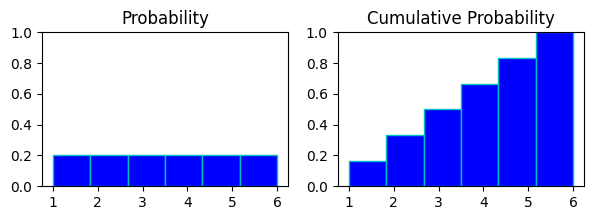

In [5]:
data = np.linspace(start=1, stop=6, num=6, dtype="int")

fig, ax = plt.subplots(1, 2, figsize=(7, 2))

ax[0].hist(data, bins=6, density=True, edgecolor="c", color="b")
ax[0].set_xticks([1, 2, 3, 4, 5, 6])
ax[0].set_title("Probability")
ax[0].set_ylim([0, 1])

ax[1].hist(data, bins=6, density=True, cumulative=True, edgecolor="c", color="b")
ax[1].set_xticks([1, 2, 3, 4, 5, 6])
ax[1].set_title("Cumulative Probability")
ax[1].set_ylim([0, 1])

plt.show()

in above chart

- probability chart of rolling a dice and cumulative probability chart of it.
- in probabaility chart every digit has same probability of appearing on the roll of dice, hence all of them are at same height.
- in cumulative prob chart evert digit(x) represents probabilities of digits<=x to appear on the roll.

like at bin 4 in cumul. prb.(rolling anything 4 or less) : p(x<=4) = p(x=1) + p(x=2) + p(x=3) + p(x=4)

### Understanding pdf and cdf

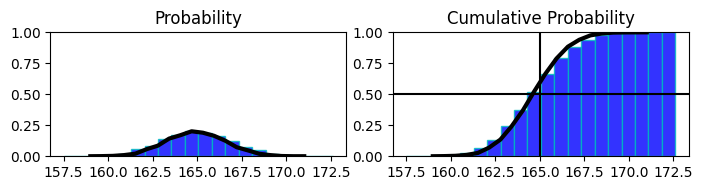

In [6]:
np.random.seed(0)
bins = 20
mu = 165
sigma = 2
data = np.random.normal(loc=mu, scale=sigma, size=5000)
x = np.linspace(mu - sigma * 3, mu + sigma * 3, bins)

fig, ax = plt.subplots(1, 2, figsize=(7, 2))

n, _, _ = ax[0].hist(data, density=True, edgecolor="c", color="b", bins=bins, alpha=0.8)
ax[0].plot(x, n, "k", lw=3)
ax[0].set_title("Probability")
ax[0].set_ylim([0, 1])

n, _, _ = ax[1].hist(
    data, density=True, cumulative=True, edgecolor="c", color="b", bins=bins, alpha=0.8
)
ax[1].plot(x, n, "k", lw=3)
ax[1].axhline(0.5, c="k")
ax[1].axvline(mu, c="k")

ax[1].set_title("Cumulative Probability")
ax[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

in above chart

- proability distribution of heights of population with mean 165 and cumul. prob. of it on the right side.
- on the right side at 0.5 mark on y shows that 50% of population has hight less than or equal to 165 (or we have accumulated 50% of distribution till 165)

probability density function f(x) $\leftarrow \frac{\partial F{x}}{\partial x} \leftarrow$ cumulative probability function F(x)

probability density function f(x) $\rightarrow \int_{-\infty}^{x} f(x) dx = F(x) \rightarrow$ cumulative probability function F(x)

## Discrete Distribution

### Uniform Distribution

A continuous random variable X is said to have a Uniform distribution over the interval [a,b], shown as 

\begin{align}
X &\sim U(a,b) 
\end{align}

* Variable X follows a Uniform distribution ranging from a to b.
* All outcomes have equal probability
* like rolling a standard dice and getting any value from 1 to 6

#### Probability Function

\begin{align}
\text{ PDF is given by}\\ 
P(y; a, b) &= \begin{cases}
\frac{1}{b-a} && a \le y \le b\\ 
0 && \text{ else}\\
\end{cases}\\ 
\end{align}

#### Expected Value

\begin{align}
\text{Expected Value} = \mu &= \frac{a+b}{2}\\
\text{Variance} = \sigma^2 &= \frac{1}{12}{(b-a)^2}
\end{align}

In [7]:
def plot_uniform_distribution(a, b, figsize=(4, 3), show_text=True):
    
    uniform_dist = stats.uniform(loc=a, scale=b-a)
    mean, var, skew, kurt = uniform_dist.stats(moments="mvsk")

    print(f"""
    Mean    : {mean:.3f}
    Variace : {var:.3f}
    Skew    : {skew:.3f}
    Kurtosis: {kurt:.3f}
    """)
    
    data = np.arange(start=a, stop=b, step=1)

    fig, ax = plt.subplots(1, 1, figsize=figsize)
    pmf = uniform_dist.pdf(data)
    ax.plot(data, pmf, "k.")
    if show_text:
        for x, y in zip(data, pmf):
            ax.text(x, y, s=round(y, 3))
    ax.bar(data, pmf, color="orange", edgecolor="white", alpha=0.7)

    if len(data) < 10:
        ax.set_xticks(data)
    ax.set_ylabel("Probability")
    ax.set_xlabel("Possible outcomes")
    
    plt.tight_layout()
    plt.show()

#### Example

* Rolling a standard dice


    Mean    : 3.500
    Variace : 2.083
    Skew    : 0.000
    Kurtosis: -1.200
    


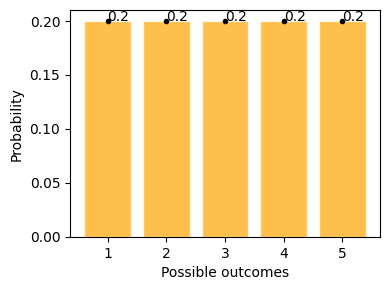

In [8]:
plot_uniform_distribution(1, 6)

This example shows possible outcomes of rolling a standard dice, where getting 1 to 6 has equal possibility of 20%

### Bernoulli Distribution

* Only one trial/ event
* Only two possible outcomes
* Like flipping a coin once.

Bernoulli Distribution is represented as 

\begin{align*}
X \sim Bern(p)
\end{align*}

Variable X follows a Bernoulli Distribution with probability of success is p.

> Conventionally p > 1-p , hence bigger probability is denoted by 1 and smaller probability is denoted by 0.

#### Probability Function


\begin{align*}
P(y;p) &\begin{cases}
p && \text{if } y = 1 \\
1-p && \text{if } y = 0
\end{cases}\\
&\text{or}\\
P(y;p) &= p^y . (1-p)^{(1- y)} \text{ , where } y \isin \{0, 1\}
\end{align*}

#### Expected Value

\begin{align*}
E(X) &= 1. p + 0. (1-p) \\ 
E(X) &= p \\
\\
\sigma^2 &= (x_0 - \mu)^2 .P(x_0) + (x_1 - \mu)^2 . P(x_1) \\
\sigma^2 &= p.(1 - p)
\end{align*}

In [12]:
def plot_bernoulli_distribution(p):
    bern_dist = stats.bernoulli(p=p)
    mean, var, skew, kurt = bern_dist.stats(moments="mvsk")

    print(f"""
    Mean    : {mean:.3f}
    Variace : {var:.3f}
    Skew    : {skew:.3f}
    Kurtosis: {kurt:.3f}
    """)

    data = np.arange(0, 2, 1, dtype=np.int32)
    pmf = bern_dist.pmf(data)
    fig, ax = plt.subplots(1, 1, figsize=(4, 2))

    ax.bar(data, pmf, alpha=0.4, lw=3)
    ax.plot(data, pmf, "k.")

    for x, y in zip(data, pmf):
        ax.text(x, y, s=round(y, 2))

    ax.set_xticks(data)
    ax.set_xlabel("Possible Outcomes")
    ax.set_ylabel("Probability")

    plt.legend()
    plt.show()


#### Examples

* Flipping an unfair coin, probability of getting tails is 0.6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



    Mean    : 0.600
    Variace : 0.240
    Skew    : -0.408
    Kurtosis: -1.833
    


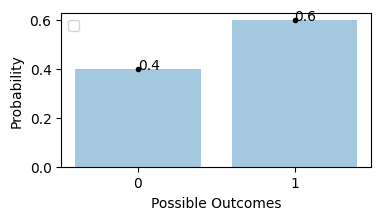

In [13]:
plot_bernoulli_distribution(0.6)

### Binomial Distribution

A number of times repeated [bernoulli trials](https://en.wikipedia.org/wiki/Bernoulli_trial#:~:text=In%20the%20theory%20of%20probability,time%20the%20experiment%20is%20conducted), as per definition limited to only 2 possible outcomes, where there is one outcome considered as success/favourable, and each trial is indepedent.

It is reprensented as
\begin{align}
X &\sim B(n, p) \\
\text{where } \\
n &= \text{number of trials}\\
p &= \text{probability of success in each trial}
\end{align}

For example, dataset X follows a binomial distribution with 10 trials with each trial has a likelihood of getting success is 0.6

\begin{align}
X &\sim B(10, 0.6)
\end{align}

if there is only one trial then binomial distribution and bernoulli distribution is related 
\begin{align}
Bern(p) = B(1, p)
\end{align}

Like in a quiz where each question has only right and wrong answers -
1. Getting one question right is a bernoulli event.
2. Getting the entire quiz right is binomial event.


E[Bernoulli] = Expected outcome for a single trial

E[Binomial] = Number of times we expect to get a specific outcome

#### Probability Function

The probability distribution function of the possible number of successful outcomes in a given number of trials, where the probability of success is same in each of them.

\begin{align}
\text{If }
n &= \text{number of trials}\\
y &= \text{number of success results}\\
P(\text{desired outcome}) &= p = \text{probability of success}\\
P(\text{alternative outcome}) &= 1-p = \text{probability of failure}\\
\end{align}


\begin{align}
B(y;n,p) &= \binom{n}{y}.{p^y}.{(1-p)}^{(n-y)} \\
\text{Where } \\
\binom{n}{y} &= \text{number of combinations favourable}\\
n &= \text{number of trials}\\
y &= \text{number of success results}\\
P(\text{desired outcome}) &= p = \text{probability of success}\\
P(\text{alternative outcome}) &= 1-p = \text{probability of failure}\\
\end{align}


Flipping an unbiased coin 3 times , proability of getting exactly 2 tails

possible combinations will be 

\begin{align*}
\binom{n}{y} &= C_{y}^{n} = \text{y out of n combinations are favourable}\\
C_{2}^{3} &= 3 \text{ combinations shown below}\\
\\
&\begin{bmatrix}
H & T & T \\
T & H & T \\
T & T & H
\end{bmatrix}
\end{align*}

then the calculation will be 
    
\begin{align}
n &= \text{number of trials} = 3\\
y &= \text{number of success, getting tails} = 2\\
P(\text{desired outcome}) &= p = \text{probability of success} = 0.5\\
B(2; 3, 0.5) &= \binom{3}{2} (0.5)^2 (0.5)^1\\
&= 0.375
\end{align}

37.5% chance is that we'll get 2 tails while flipping a coin 3 times in a row.

#### Expected Value

\begin{align}
E(X) &= X_0 P(X_0) + X_1 P(X_1) + ... + X_n P(X_n)\\
y &\sim B(n, p)\\
E(Y) &= \mu = n.p\\
\\
\sigma^2 &= E(Y^2) - [E(Y)]^2 = n.p.(1 - p)\\
\end{align}

In [ ]:
def plot_binomial_distribution(n, p, show_text=True, figsize=(4, 2)):
    binom_dist = stats.binom(n=n, p=p)

    mean, var, skew, kurt = binom_dist.stats(moments="mvsk")
    print(f"""
    Mean    : {mean:.3f}
    Variace : {var:.3f}
    Skew    : {skew:.3f}
    Kurtosis: {kurt:.3f}
    """)
    data = np.arange(0, n + 1, step=1, dtype=np.int64)
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    pmf = binom_dist.pmf(data)
    ax.plot(data, pmf, "k.", label="pmf")
    if show_text:
        for x, y in zip(data, pmf):
            ax.text(x, y, s=round(y, 3))
    ax.bar(data, pmf, color="orange", edgecolor="white", alpha=0.7)

    if len(data) < 10:
        ax.set_xticks(data)
    ax.set_ylabel("Probability of Success")
    ax.set_xlabel("Number of Success/favourable trials")
    plt.legend()
    plt.tight_layout()

#### Examples

* for n trials there will be n+1 bars in the distribution


    Mean    : 2.500
    Variace : 1.250
    Skew    : 0.000
    Kurtosis: -0.400
    


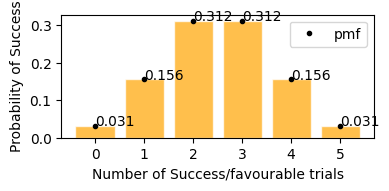

In [ ]:
plot_binomial_distribution(n=5, p=0.5)

* Flipping a coin 2 times, probability of getting head


    Mean    : 1.000
    Variace : 0.500
    Skew    : 0.000
    Kurtosis: -1.000
    


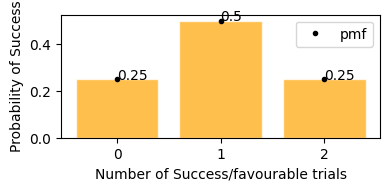

In [ ]:
plot_binomial_distribution(n=2, p=0.5)

Probability of getting 0 or 2 heads is 25%, and getting exactly 1 head probability is 50%.


    Mean    : 1.500
    Variace : 0.750
    Skew    : 0.000
    Kurtosis: -0.667
    


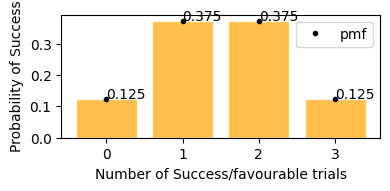

In [ ]:
plot_binomial_distribution(n=3, p=0.5)

> This plot represents on x axis as success events and y is the probability of that happening.

In plot above, we can see the same result,

1. getting exactly 2 tails - 37.5%
2. getting exactly 1 tails - 37.5%
3. getting exactly no tails - 12.5%
4. getting exactly 3 tails - 12.5%



* We are going to plan for next 6 days for the stock of Tata Motors\ The patterns show -
    * Chances of increament in value : P(increase) = 0.7
    * Chances of drop in value : P(decrease) = 0.3

* First lets plot the binomial distribution for the use case


    Mean    : 4.200
    Variace : 1.260
    Skew    : -0.356
    Kurtosis: -0.206
    


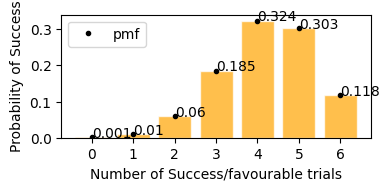

In [59]:
plot_binomial_distribution(n=6, p=0.7)

According to plot above

1. Probability of stock to increase exactly 3 days in next 6 days would be = 18.5%
2. Probability of stock to increase exactly 5 days in next 6 days would be = 30.3%
2. Probability of stock to increase exactly 4 days in next 6 days would be = 32.4%

* In case of coin flip 10 times, getting tails p(sucess rate) = 0.5 (50%), so in the graph it is visible that in 10 trials, getting exactly 5 successes(Heads) has the highest probability, similarly getting around 4 and 6 heads also have high probability, in same way getting only 2 (<5) or getting 8 (>5) successes has a very low probability.


    Mean    : 5.000
    Variace : 2.500
    Skew    : 0.000
    Kurtosis: -0.200
    


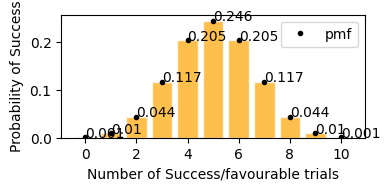

In [60]:
plot_binomial_distribution(n=10, p=0.5)

* now lets take only 0.2(20%) success rate (getting tails) for 50 events.
Here with success rate of 14% getting 10 tails in 50 trials has highest probability. and getting 25 tails (50% of the times) out of 50 trials is  ~0 .


    Mean    : 10.000
    Variace : 8.000
    Skew    : 0.212
    Kurtosis: 0.005
    


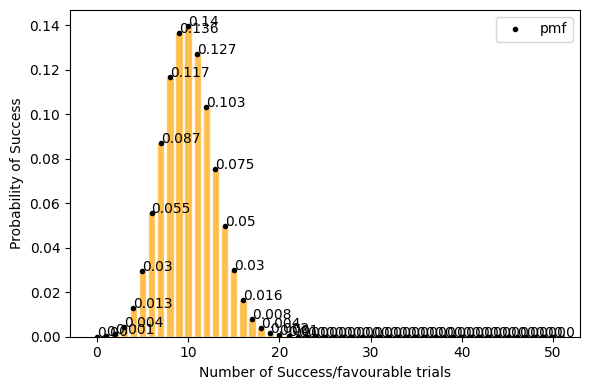

In [61]:
plot_binomial_distribution(n=50, p=0.2, figsize=(6, 4))

* but for a large data set(a lot of trials, big n) Probability of success P is neither close to 0 or 1. the binomial distribution can be approximated by normal distribution. see below.


    Mean    : 50.000
    Variace : 25.000
    Skew    : 0.000
    Kurtosis: -0.020
    


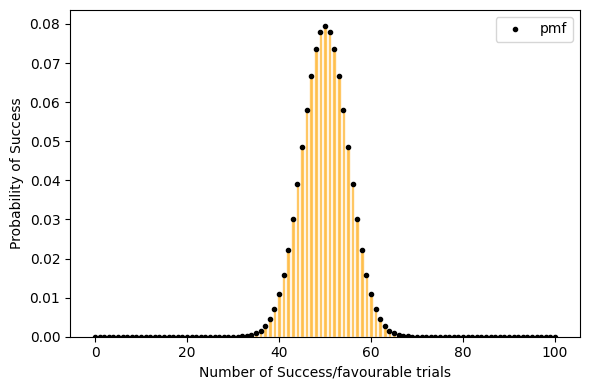

In [62]:
plot_binomial_distribution(n=100, p=0.5, show_text=False, figsize=(6, 4))

### Poisson Distribution

French dude did a bunch of things in stats

- Events occuring in a fixed time interval or region of oppotunity.
- only needs one parameter, expected number of events per region/time interval $\lambda$
- Average number of successes($\mu$) that occurs in a specified region is known
- Unlike binomial distribution, Poisson continues to go on forever, hence distributioon is bounded by 0 and $\infty$

So we have assumptions also

* The rate at which event occur is constant.
* events are independent(one event doesn't affect other events)


$pmf(x;\mu) = e^{-\mu} \frac{\mu^x}{x!}$

or 

$pmf(x;\lambda) = e^{-\lambda} {\frac{\lambda^x}{x!}}$


e = 2.718 \
$\mu$ or $\lambda$ = mean number of successes \
x = actual number of successes

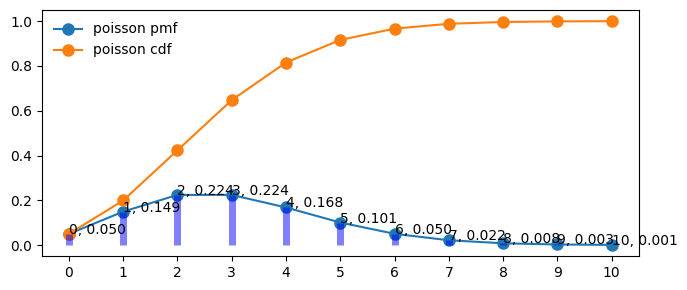

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))

mu = 3
mean, var, skew, kurt = stats.poisson.stats(mu, moments="mvsk")

x = np.arange(0, 11)
y_pmf = stats.poisson.pmf(x, mu)
y_cdf = stats.poisson.cdf(x, mu)
ax.plot(x, y_pmf, "-o", ms=8, label="poisson pmf")
ax.plot(x, y_cdf, "-o", ms=8, label="poisson cdf")

ax.vlines(x, 0, y_pmf, colors="b", lw=5, alpha=0.5)

for xy in zip(x, y_pmf):
    ax.annotate(f"{xy[0]}, {xy[1]:.3f}", xy=xy, textcoords="data")

ax.set_xticks(x)
ax.legend(loc="best", frameon=False)

plt.tight_layout()
plt.show()

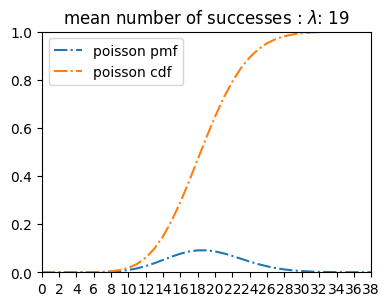

In [42]:
fig = plt.figure(figsize=(4, 3))

ax1 = fig.add_subplot()

l = 20

ax1.set_xlim(0, l)
ax1.set_ylim(0, 1)
x = np.arange(0, l * 2)

(plot1,) = ax1.plot([], [], "-.", ms=8, label="poisson pmf")
(plot2,) = ax1.plot([], [], "-.", ms=8, label="poisson cdf")

ax1.set_xticks(x[::2])
plt.legend(loc="best")
plt.tight_layout()


def draw_frame(n):
    mu = n
    y_pmf = stats.poisson.pmf(x, mu)
    y_cdf = stats.poisson.cdf(x, mu)
    plot1.set_data(x, y_pmf)
    plot2.set_data(x, y_cdf)
    ax1.set_title(f"mean number of successes : $\lambda$: {n}")
    return (
        plot1,
        plot2,
    )


anim = animation.FuncAnimation(fig, draw_frame, frames=l, interval=1000, blit=True)

display.HTML(anim.to_html5_video())

so here is a question from zed

there is a website with a feature to but stuff online. Now the study is between number of clicks vs those clicks leading to an actual sale.
now lambda or mu or mean click thorugh sales per day is 12.
1. exactly 10 click through sales in a day.
2. at least 10 click through sales in a day.

in below graph we can see

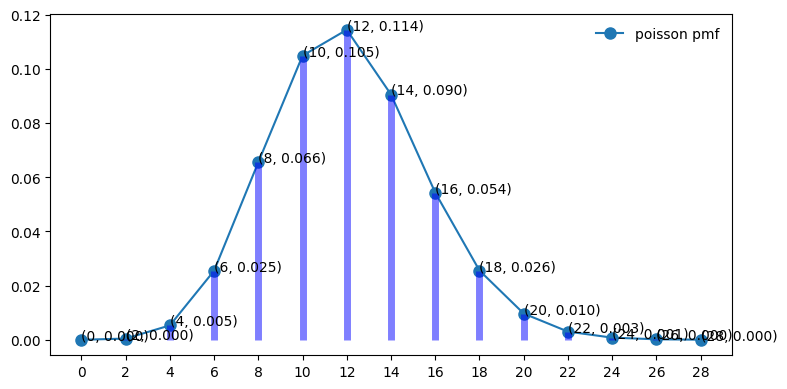

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

mu = 12
mean, var, skew, kurt = stats.poisson.stats(mu, moments="mvsk")

x = np.arange(0, 30, 2)
y_pmf = stats.poisson.pmf(x, mu)
y_cdf = stats.poisson.cdf(x, mu)
ax.plot(x, y_pmf, "-o", ms=8, label="poisson pmf")

ax.vlines(x, 0, y_pmf, colors="b", lw=5, alpha=0.5)

for xy in zip(x, y_pmf):
    ax.annotate(f"({xy[0]}, {xy[1]:.3f})", xy=xy, textcoords="data")

ax.set_xticks(x)
ax.legend(loc="best", frameon=False)

plt.tight_layout()
plt.show()

- exactly 10 click through sales in a day = 0.105

In [44]:
y_pmf[10], stats.poisson.pmf([10], mu=12)

(0.00968203216821916, array([0.10483726]))

- at least 10 click through sales in a day 

In [45]:
y_pmf[10:].sum(), stats.poisson.pmf(range(10, 30), mu=12).sum()

(0.013694679723022707, 0.7575989681906888)

but here the assumption is rate at which these events(clicks) are occuring is constant. In real world I don't think it can be regulated/ or profitable to regulate clicks per time interval.

### Hypergeometric Distribution

- Equivalent to the binomial distribution but `without replacement`.
- here card playing analogy comes in picture as if one card is drawn from the deck then proabilities are changed for all the other cards to be drawn next. If the card is again put in deck then all cards to be drawn has same prob again and it converts into `binomial`.

$pmf(x,N,A,n) = \frac{\binom{A}{x} \binom{N-A}{n-x}}{\binom{N}{n}}$

N = total population size\
A = total item of interest in population\
n = sample size\
x = items of intereset in sample


for scipy 

M = total population size\
n = total item of interest in population\
N = sample size\
x = items of intereset in sample


scenario is probability distribution of number pf spades in a 5 card poker game.

total population size = 52\
total item of interest in population = 13 (number pf spades)\
sample size = 5\
items of intereset in sample = rangin from 0 to 5



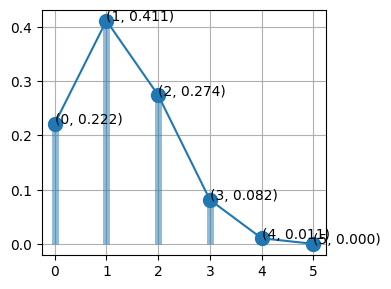

In [ ]:
hypergeom_obj = stats.hypergeom(M=52, n=13, N=5)


fig, ax = plt.subplots(1, 1, figsize=(4, 3))

x = range(6)
y_pmf = hypergeom_obj.pmf(x)

ax.plot(y_pmf, "o-", ms=10)
ax.vlines(x, 0, y_pmf, lw=5, alpha=0.5)

ax.set_xticks(x)
for xy in zip(x, y_pmf):
    ax.annotate(f"({xy[0]}, {xy[1]:.3f})", xy=xy, textcoords="data")

plt.grid()
plt.tight_layout()
plt.show()


lets say the question is what is the probability of drawing 2 spades in 5 card poker game.\
now x = 2

from graph\
when x = 2\
pmf(X=2) = 0.274


## Continuous Distribution

### Normal(Gaussian) Distribution

- the normal distribution is by far the most important probability distribution. One of the main reasons for that is the Central Limit Theorem (CLT) 
- area under the curve(AUC) = 1

- say x $\in R$, x is distributed Gaussian with mean $\mu$ , variance $\sigma^2$, standard deviation $\sigma$
    
\begin{align}
x &\sim N(\mu, \sigma^2) \text{, where}\\
pdf(x) &= \frac{1}{\sigma\sqrt{2\pi}} \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)\\
\mu &= \frac{1}{m}\sum_{i=1}^{m}x^{(i)}\\
\sigma &=  \frac{1}{m}\sum_{i=1}^{m}(x^{(i)} - \mu)^2
\end{align}

In [4]:
norm = stats.norm(loc=50, scale=10)
mean, var, skew, kurtosis = norm.stats(moments="mvsk")
std = np.sqrt(var)

print(mean, var, skew, kurtosis)

50.0 100.0 0.0 0.0


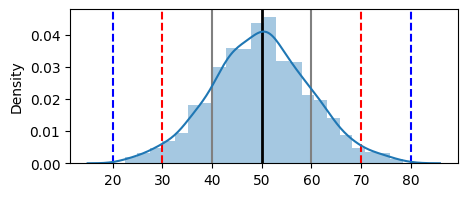

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.axvline(mean, c="k", lw=2)
ax.axvline(mean - std, c="grey")
ax.axvline(mean + std, c="grey")
ax.axvline(mean - std * 2, c="r", ls="--")
ax.axvline(mean + std * 2, c="r", ls="--")
ax.axvline(mean - std * 3, c="b", ls="--")
ax.axvline(mean + std * 3, c="b", ls="--")
sns.distplot(norm.rvs(1000), kde=True, ax=ax)

plt.show()

In plot above 
- 68% within 1 standard deviation.
- 98% within 2 standard deviation.
- 99.7% within 3 standard deviation.

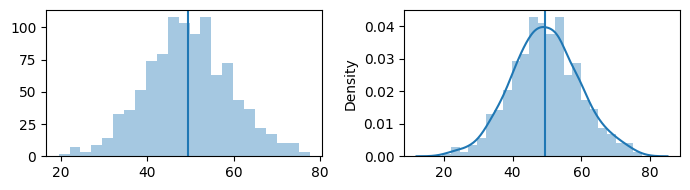

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(7, 2))
data = norm.rvs(1000, random_state=0)

ax[0].axvline(np.mean(data))
sns.distplot(data, kde=False, ax=ax[0])

ax[1].axvline(np.mean(data))
sns.distplot(data, kde=True, ax=ax[1])

plt.tight_layout()
plt.show()

#### Standard normal distriution (z distribution)

- normal distribution with mean = 0 and standard deviation = 1.

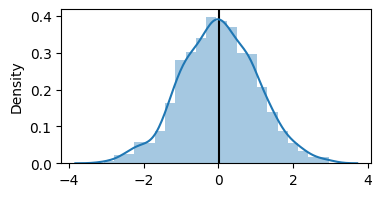

In [7]:
snd = np.random.normal(loc=0, scale=1, size=1000)

fig, ax = plt.subplots(1, 1, figsize=(4, 2))

ax.axvline(snd.mean(), color="k")
sns.distplot(snd, ax=ax)

plt.show()

#### Coverting to z-scores (Standardization/ Normalization)

Converting data to z-scores(normalizing or standardizing) doesn't convert the data to normal distribution, it just puts the data in the same scale as standard normal distribution. 

- **Normalization Process** subtract mean and devide by the standard deviation. $z = \frac{x - \bar{x}}{\sigma}$

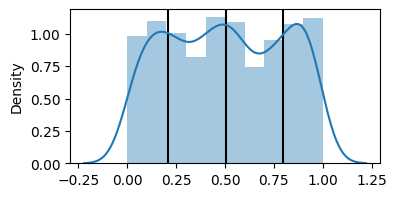

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
data = np.random.rand(1000)

ax.axvline(data.mean(), color="k")
ax.axvline(data.mean() - data.std(), color="k")
ax.axvline(data.mean() + data.std(), color="k")

sns.distplot(data, ax=ax)
plt.show()

In [9]:
z_scores = (data - data.mean()) / data.std(ddof=1)

z_scores.mean(), z_scores.std(ddof=1)

(-2.6290081223123706e-16, 1.0)

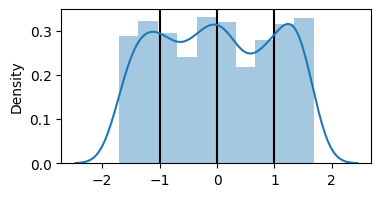

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))

ax.axvline(z_scores.mean(), color="k")
ax.axvline(z_scores.mean() - z_scores.std(), color="k")
ax.axvline(z_scores.mean() + z_scores.std(), color="k")
sns.distplot(z_scores, ax=ax)

plt.show()

#### Method to calculate auc with z-score

Why the hell would I calculate z-score? `TBD`


    Min     :   38.057147077212285 
    Max     :   110.98310102305439 
    Median  :   74.90401793747884 
    Mode    :   ModeResult(mode=38.057147077212285, count=1) 
    Mean    :   74.99552606711973 
    Std dev :   9.906804817099255   
    


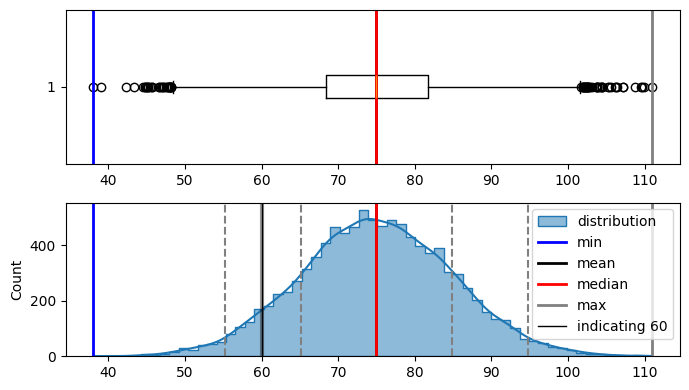

In [11]:
mu = 75
sigma = 10

bell_curve_data = np.random.normal(loc=mu, scale=sigma, size=(10000,))
plot_distribution(bell_curve_data, indicate_data=[60], figsize=(7, 4))

- in the curve above i can see. i need to find z-score(area under the curve from left side only) for `-1.49`.
- so lets look at the z score table

<img src="ZValue.png" height="200px"/>

#### z-score table

This table tells us area under the curve(probability in this case) based on z-score.

<img src="NegativeZValues.png" width="600px"/>

<img src="PositiveZValues.png" width="600px"/>

- we need negative 1.49
- so from top to bottom i'll select -1.4 
- and from left to right i'll select 0.09
- i get 0.06811


    Min     :   -2.693477658187908 
    Max     :   3.321601166647714 
    Median  :   -0.026861025439324573 
    Mode    :   ModeResult(mode=-2.693477658187908, count=1) 
    Mean    :   -0.032810027367517494 
    Std dev :   0.9819687703292147   
    


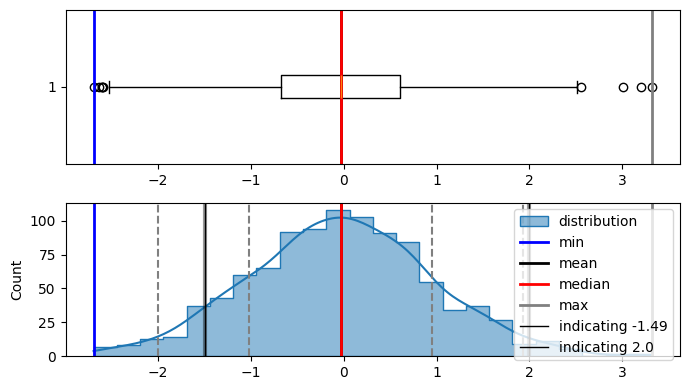

In [12]:
data = np.random.normal(loc=0, scale=1, size=1000)
plot_distribution(data, indicate_data=[-1.49, 2.0], figsize=(7, 4))

here in the diagram, area under the curve on the left side from -1.49 is 0.06811(6.8%) and 2.0 is 0.9772(97.72%). and this is correct also as -1.49 doesnt have a lot of data on the left side of it.

In [13]:
stats.norm.ppf(0.06811)  # percent point function

-1.4900161102718568

In [14]:
stats.norm.ppf(0.9772)

1.9990772149717693

#### Central limit theorem

- The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement, then the distribution of the `sample means` will be approximately normally distributed (we can use normal distribution statistic).
- simply for a population, increase number of samples then distribution moves towards normal distribution.
- Central limit theorem allows normal-approximation formulas like t-distribution to be used in calculating sampling distributions for inference ie confidence intervals and hypothesis tests.


    Min     :   0.00034494409119278924 
    Max     :   0.9998556266062902 
    Median  :   0.5058725592216615 
    Mode    :   ModeResult(mode=0.00034494409119278924, count=1) 
    Mean    :   0.49948958836972196 
    Std dev :   0.288386913695571   
    


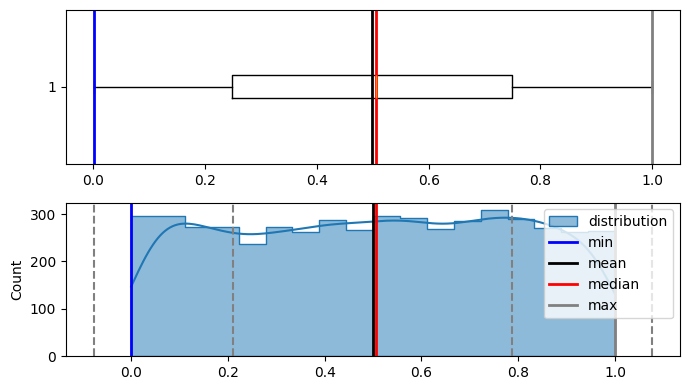

In [15]:
pop_size = 5000

population = np.random.rand(pop_size)

plot_distribution(population, figsize=(7, 4))

As it is visible that population is not normally distributed.

Now lets generate random sample from the iterations, calculate there means, and plot them iteration by iteration, 
`although population wasn't normally distributed but according to CENTRAL LIMIT THEOREM means of resamples should be normally distributed`.

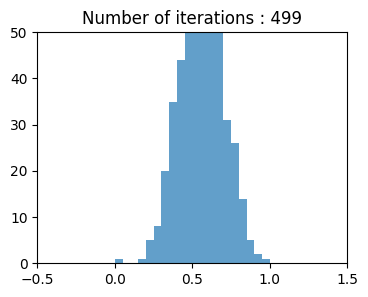

In [16]:
bins = 20
resampling_iterations = 500

sample_size = 500
sample = np.random.choice(population, size=sample_size)

sample_means = []
# sample_means.append(sample.mean())


fig = plt.figure(figsize=(4, 3))

ax1 = fig.add_subplot()

ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(0, 50)

_, _, container = ax1.hist(sample_means, bins=bins, density=True, alpha=0.7)


def draw_frame(n):
    sample = np.random.choice(population, size=sample_size)
    sample_means.append(sample.mean())

    heights, _ = np.histogram(sample_means, bins=bins)
    for height, rect in zip(heights, container.patches):
        rect.set_height(height)
    ax1.set_title(f"Number of iterations : {n}")

    return container.patches


anim = animation.FuncAnimation(
    fig, draw_frame, frames=resampling_iterations, interval=100, blit=True
)

display.HTML(anim.to_html5_video())

### Long Tailed Distribution

**Tail** long narrow portion of a frequency dist. extreme values occur at low frequency.

most data is not normally distribution.

### Chi-squared Distribution

- if a random variable $Z$ has standard normal distribution then $Z_1^2$ has the $\chi^2$ distribution with one degree of freedom
- if a random variable $Z$ has standard normal distribution then $Z_1^2 + Z_2^2$ has the $\chi^2$ distribution with two degree of freedom
- if $Z_1,Z_2,...,Z_k$ are independent standard normal (distribution) random variables then $Z_1^2 + Z_2^2 + ... + Z_k^2$ has the $\chi^2$ distribution with k degrees of freedom


All these are actually explained below.

\begin{align}   
\text{Probability density function }f(x,k) =
\begin{cases} 
\frac{1}{2^{(k/2)} \Gamma{(k/2)}} . x^{(k/2) -1}. e^{(-x/2)}  & \text{for } x \ge 0\\
0 & else 
\end{cases}
\end{align}


Where 

k = degree of freedom


Gamma func $\Gamma(x)=(x-1)!$

#### Detailed intuition

`Can be thought of as the square of selection taken from a standard normal distribution`
Derivation $\chi_k^2 = \sum_{i=1}^k Z_i^2$

##### 1 dof

 $\chi^2 = Z_1^2$

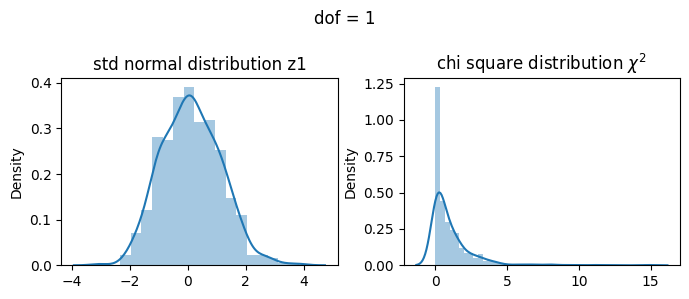

In [17]:
z1 = np.random.normal(size=500)

X1 = z1**2

fig, ax = plt.subplots(1, 2, figsize=(7, 3))

sns.distplot(z1, ax=ax[0])
ax[0].set_title("std normal distribution z1")

sns.distplot(X1, ax=ax[1])
ax[1].set_title("chi square distribution $\chi^2$")

fig.suptitle("dof = 1")
plt.tight_layout()
plt.show()

##### 2 dof

$\chi^2= Z_1^2 + Z_2^2$ 

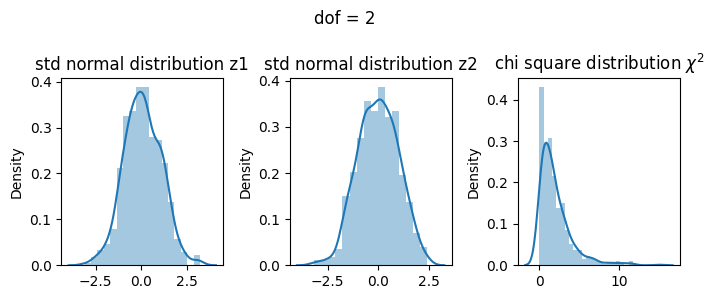

In [18]:
z1 = np.random.normal(size=500)
z2 = np.random.normal(size=500)

X2 = z1**2 + z2**2

fig, ax = plt.subplots(1, 3, figsize=(7, 3))

sns.distplot(z1, ax=ax[0])
ax[0].set_title("std normal distribution z1")
sns.distplot(z2, ax=ax[1])
ax[1].set_title("std normal distribution z2")
sns.distplot(X2, ax=ax[2])
ax[2].set_title("chi square distribution $\chi^2$")

fig.suptitle("dof = 2")
plt.tight_layout()
plt.show()

##### 3 dof


$\chi^2 = Z_1^2 + Z_2^2 + Z_3^2$

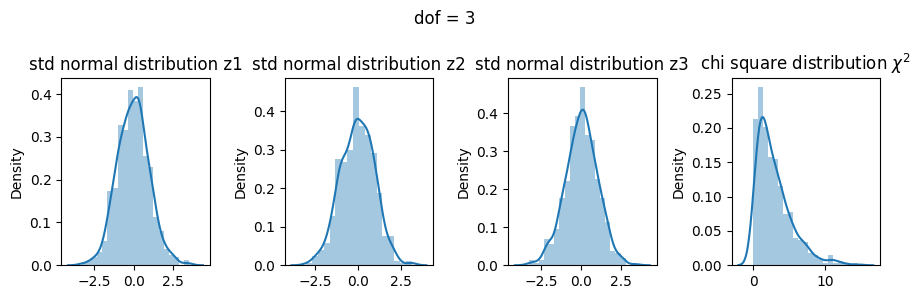

In [19]:
z1 = np.random.normal(size=500)
z2 = np.random.normal(size=500)
z3 = np.random.normal(size=500)


X3 = z1**2 + z2**2 + z3**2

fig, ax = plt.subplots(1, 4, figsize=(9, 3))

sns.distplot(z1, ax=ax[0])
ax[0].set_title("std normal distribution z1")
sns.distplot(z2, ax=ax[1])
ax[1].set_title("std normal distribution z2")
sns.distplot(z3, ax=ax[2])
ax[2].set_title("std normal distribution z3")
sns.distplot(X3, ax=ax[3])
ax[3].set_title("chi square distribution $\chi^2$")

fig.suptitle("dof = 3")
plt.tight_layout()
plt.show()

#### Comparing all three dof

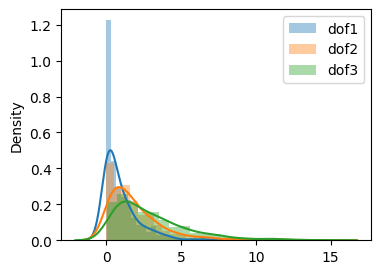

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.distplot(X1, label="dof1", ax=ax)
sns.distplot(X2, label="dof2", ax=ax)
sns.distplot(X3, label="dof3", ax=ax)

plt.legend()
plt.show()

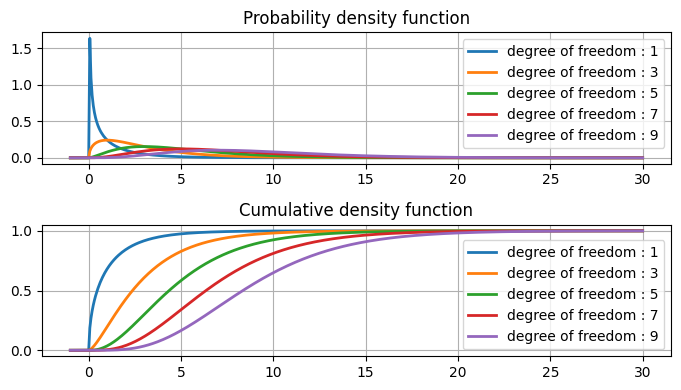

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(7, 4))
data = np.linspace(start=-1, stop=30, num=500)
for dof in range(1, 10, 2):
    chi2_dist = stats.chi2(dof)
    ax[0].plot(data, chi2_dist.pdf(data), label=f"degree of freedom : {dof}", lw=2)
    ax[1].plot(data, chi2_dist.cdf(data), label=f"degree of freedom : {dof}", lw=2)

ax[0].legend(loc="best")
ax[0].grid()
ax[0].set_title("Probability density function")

ax[1].legend(loc="best")
ax[1].grid()
ax[1].set_title("Cumulative density function")

plt.tight_layout()
plt.show()

#### Chi-square table

this table includes data point, area under the curve(first row) and degree of freedom(first column).

The areas given across the top are the `areas to the right` of the critical value. To look up an area on the left, subtract it from one, and then look it up (ie: 0.05 on the left is 0.95 on the right)

ref = https://people.richland.edu/james/lecture/m170/tbl-chi.html

<img src="chi-square.png" width="600px"/>

<iframe src='https://people.richland.edu/james/lecture/m170/tbl-chi.html' width="600px" height=500 >Chi Squared Table </iframe>

Ref : https://people.richland.edu/james/lecture/m170/tbl-chi.html

#### degree of freedom 1 

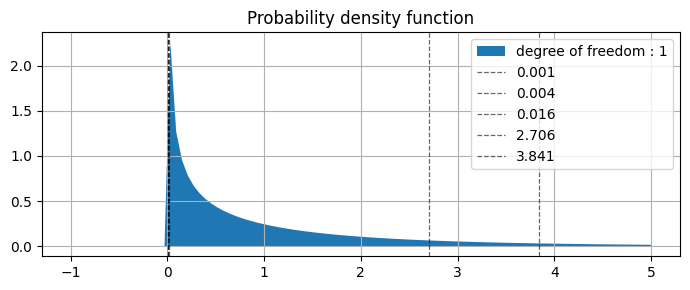

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
data = np.linspace(start=-1, stop=5, num=100)

dof = 1
chi2_dist = stats.chi2(dof)
ax.fill_between(data, chi2_dist.pdf(data), label=f"degree of freedom : {dof}", lw=2)

for i in [0.001, 0.004, 0.016, 2.706, 3.841]:
    ax.axvline(i, c="k", linestyle="--", linewidth=0.9, alpha=0.6, label=i)

ax.legend(loc="best")
ax.grid()
ax.set_title("Probability density function")

plt.tight_layout()
plt.show()

from above plot we can see that 

|||||||
|-|-|-|-|-|-|
| 0.001  | 0.004   |  0.016 | 2.706  | 3.841 | values are specifying |
| 0.975  |  0.95   |  0.90  |   0.10 |  0.05 | AUC of the right side of the curve |

(picked values from table above)


#### degree of freedom 5

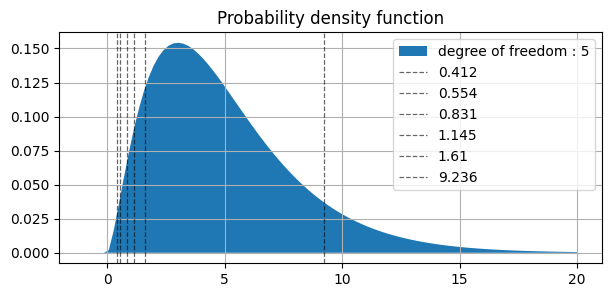

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(7, 3))
data = np.linspace(start=-1, stop=20, num=100)

dof = 5
chi2_dist = stats.chi2(dof)
ax.fill_between(data, chi2_dist.pdf(data), label=f"degree of freedom : {dof}", lw=2)

for i in [0.412, 0.554, 0.831, 1.145, 1.610, 9.236]:
    ax.axvline(i, c="k", linestyle="--", linewidth=0.9, alpha=0.6, label=i)

ax.legend(loc="best")
ax.grid()
ax.set_title("Probability density function")

plt.show()

similarly in plot above
|||||||
|-|-|-|-|-|-|
| values | 0.412 | 0.554 | 0.831 | 1.145 | 1.610 | 9.236 |
| AUC(right side) | 0.995 | 0.99 | 0.975 | 0.95 | 0.90 | 0.10 | 	


### Student's t distribition

- Small sample statistics.
- Underlying distribution is normal.
- Unknown population standard normal distribution.
- Sample size too small to apply Central limit theorem.
- Normally shaped distribution but thicker and long tails.
- As degree of freedom increases t distribution tends towards the standard normal distribution.


> Z has standard normal distribution, U has the $\chi^2$ distribution with $\nu$ degree of freedom. Z and U are independent.

\begin{align}
t &= \frac{Z}{\sqrt{\frac{U}{\nu}}} \text{ has the t distribution with }\nu \text{ degree of freedom}\\
Z &= \frac{x - \mu}{\sigma}\\
\\
\text{ pdf }f(x, \nu) &= \frac{\Gamma (\frac{\nu + 1 }{2})}{\sqrt{\pi \nu} \Gamma (\frac{\nu}{2})}(1+ \frac{x^2}{\nu})^{-\frac{(\nu + 1)}{2}}\\
\\\nu &= n-1\\
\\
\mu &= 0 \text{ for } \nu < 1\\
\\
\sigma^2 &= \frac{\nu}{\nu - 2} for {\nu} > 2\\
\Gamma(x) &= (x-1)! \text{ Gamma Function}
\end{align}

Ref : https://en.wikipedia.org/wiki/Student%27s_t-distribution



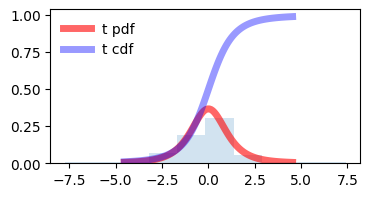

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
df = 3
size = 100
mean, var, skew, kurt = stats.t.stats(df, moments="mvsk")
x = np.linspace(stats.t.ppf(0.01, df), stats.t.ppf(0.99, df), size)

ax.plot(x, stats.t.pdf(x, df), "r-", lw=5, alpha=0.6, label="t pdf")
ax.plot(x, stats.t.cdf(x, df), "b-", lw=5, alpha=0.4, label="t cdf")

ax.hist(stats.t.rvs(df, size=size), density=True, histtype="stepfilled", alpha=0.2)
ax.legend(loc="best", frameon=False)
plt.show()

demonstraion on increasing degrees of freedom, t distribution approaches towards normal distribution.
and it seems correct also as by increasing degrees of freedom ($\nu$ = n - 1) we are increasing the sample size also.

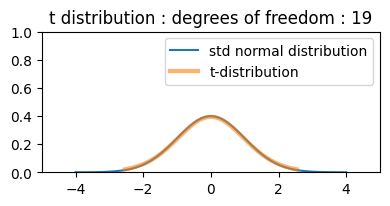

In [25]:
fig = plt.figure(figsize=(4, 2))

ax1 = fig.add_subplot()

ax1.set_xlim(-5, 5)
ax1.set_ylim(0, 1)
d = np.linspace(-4, 4, 100)

ax1.plot(d, stats.norm.pdf(d), label="std normal distribution")
(plot1,) = ax1.plot([], [], lw=3, alpha=0.6, label="t-distribution")
plt.legend(loc="best")
plt.tight_layout()


def draw_frame(n):
    df = n
    mean, var, skew, kurt = stats.t.stats(df, moments="mvsk")

    x = np.linspace(stats.t.ppf(0.01, df), stats.t.ppf(0.99, df), 1000)
    plot1.set_data(x, stats.t.pdf(x, df))
    ax1.set_title(f"t distribution : degrees of freedom : {n}")
    return (plot1,)


anim = animation.FuncAnimation(fig, draw_frame, frames=20, interval=1000, blit=True)

display.HTML(anim.to_html5_video())

#### t table

t table here shows degrees of freedom and cumulative distribution, probability distribution(one tail, two tails) and gives t-statistic.

<iframe src="https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf" width="100%" height=500>t table</iframe>

<img src='t_table.png' width="600px"/>

Ref : https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

Lets say we need to know what t-statistic with 4 df provides 2.5% in upper tail ? or we need to know the point above which lies 2.5% of the distribution.

the table tells us AUC. so actually we need to find the auc after the 2.5%(0.025) = 1 - 0.025 = 0.975

so either $t_{0.975}$ or one tail 0.025. in table above for df 4 and given inputs then t-statistic = 2.776

or use scipy

In [26]:
stats.t.ppf(0.975, 4)

2.7764451051977987

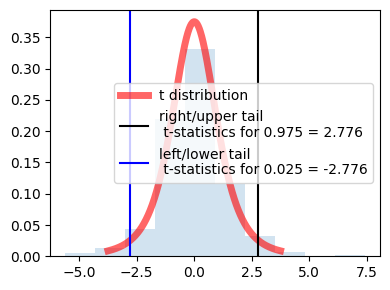

In [27]:
np.random.seed(10)
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
df = 4
size = 500
p = 0.025  # 2.5%

mean, var, skew, kurt = stats.t.stats(df, moments="mvsk")

x = np.linspace(stats.t.ppf(0.01, df), stats.t.ppf(0.99, df), size)

ax.plot(x, stats.t.pdf(x, df), "r-", lw=5, alpha=0.6, label="t distribution")
ax.hist(stats.t.rvs(df, size=size), density=True, histtype="stepfilled", alpha=0.2)

right_t_stat = stats.t.ppf(1 - p, df)
left_t_stat = stats.t.ppf(p, df)
ax.axvline(
    right_t_stat,
    c="k",
    label=f"right/upper tail \n t-statistics for {1-p} = {right_t_stat:.3f}",
)
ax.axvline(
    left_t_stat,
    c="b",
    label=f"left/lower tail \n t-statistics for {p} = {left_t_stat:.3f}",
)

ax.legend(loc="best")
plt.tight_layout()
plt.show()

because of the symmetry values are same for left and right just the sign is opposite.

`in the center actually it is showing 95% distribution (100 - 2.5 - 2.5)`

### F Distribution

suppose $U_1$ has $\chi^2$ distribution with $df_1$ degrees of freedom \
and $U_2$ has $\chi^2$ distribution with $df_2$ degrees of freedom \
then $F=\frac{\frac{U_1}{df_1}}{\frac{U_2}{df_2}}$ has an F distribution


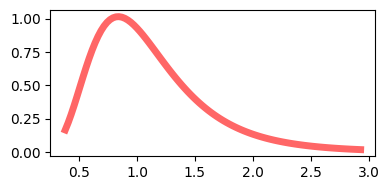

In [28]:
dfn, dfd = 29, 18  # degree of fre
mean, var, skew, kurt = stats.f.stats(dfn, dfd, moments="mvsk")

x = np.linspace(stats.f.ppf(0.01, dfn, dfd), stats.f.ppf(0.99, dfn, dfd), 100)

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.plot(x, stats.f.pdf(x, dfn, dfd), "r-", lw=5, alpha=0.6, label="f pdf")

plt.tight_layout()
plt.show()

### Beta Distribution

* Part of continuous probability distribution familily
* within the interval [0, 1]
* two positive shape parameters $\alpha$ and $\beta$, to shape the probability distribution


\begin{align*}
f(x; \alpha, \beta) &= \frac{x^{\alpha}(1-x)^{\beta}}{B(\alpha, \beta)}\\
\\
\text{ where }\\
B(\alpha, \beta) &= \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}\\
\Gamma(n) &= (n - 1)!
\end{align*}



In [29]:
parameters = [(0.5, 0.5), (5, 1), (1, 3), (2, 2), (2, 5)]

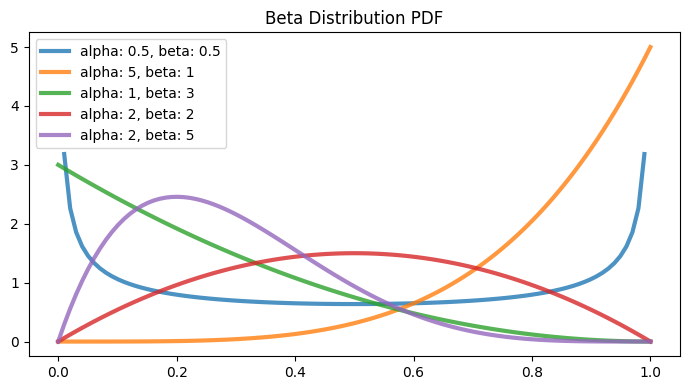

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
for a, b in parameters:
    # print(a, b)
    x = np.linspace(stats.beta.ppf(0, a, b), stats.beta.ppf(1, a, b), 100)
    ax.plot(
        x,
        stats.beta.pdf(x, a, b),
        alpha=0.8,
        linewidth=3,
        label=f"alpha: {a}, beta: {b}",
    )
ax.set_title("Beta Distribution PDF")
ax.legend()
plt.tight_layout()
plt.show()

### Exponential Distribution

- The time between events in a Poisson process ('inverse' of Poisson)

| Poisson | Exponential |
|---------|-------------|
| Number of cars passing a tollgate in one hour. | Number of hours between car arrivals. |


$pdf(x;\lambda) = \begin{cases}
\lambda  e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$

$\lambda$ = rate(inverse scale) parameter/ exponentiation parameter.

or 

$pdf(x;\beta) = \begin{cases}
\frac{1}{\beta}  e^{-\frac{x}{\beta}} & x \ge 0, \\
0 & x < 0.
\end{cases}$

$\beta$ = scale parameter.


$\lambda = \frac{1}{\beta}$

Ref : https://en.wikipedia.org/wiki/Exponential_distribution

In [31]:
class ExpDist:
    def __init__(self, lambd):
        self.lambd = lambd

    def pdf(self, x):
        return (self.lambd * (np.exp(-self.lambd * x))) * (x >= 0)

    def cdf(self, x):
        return (1 - np.exp(-self.lambd * x)) * (x >= 0)

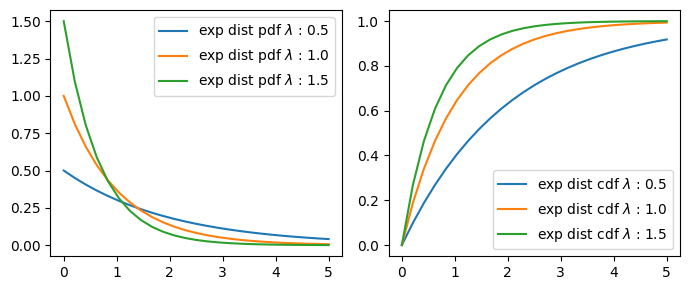

In [32]:
x = np.linspace(0, 5, 25)
x_tick_s = np.linspace(0, 5, 6)
fig, ax = plt.subplots(1, 2, figsize=(7, 3))

for l in np.arange(0.5, 2, 0.5):
    y_pdf = ExpDist(l).pdf(x)

    ax[0].plot(x, y_pdf, "-", label=f"exp dist pdf $\lambda$ : {l}")
    ax[0].set_xticks(x_tick_s)
    ax[0].legend()

for l in np.arange(0.5, 2, 0.5):
    y_cdf = ExpDist(l).cdf(x)

    ax[1].plot(x, y_cdf, "-", label=f"exp dist cdf $\lambda$ : {l}")
    ax[1].set_xticks(x_tick_s)
    ax[1].legend()

plt.tight_layout()
plt.show()

### Weibull Distribution

the event rate does not remain constant over time. If the period
over which it changes is much longer than the typical interval between events,
there is no problem; you just subdivide the analysis into the segments where rates
are relatively constant, as mentioned before.

The Weibull distribution is an extension of the
exponential distribution, in which the event rate is allowed to change, as specified
by a shape parameter k.

$f(x;\beta,k) =
\begin{cases}
\frac{k}{\beta}\left(\frac{x}{\beta}\right)^{k-1}e^{-(x/ \beta)^{k}} & x\geq0 ,\\
0 & x<0,
\end{cases}$

or

$f(x;\lambda,k) =
\begin{cases}
k{\lambda} \left({\lambda}{x}\right)^{k-1}e^{-(\lambda x)^{k}} & x\geq0 ,\\
0 & x<0,
\end{cases}$

a or $\lambda$ is the exponentiation parameter.

$\frac{1}{\beta}$ is the scale parameter.

c or $k$ is the shape parameter of the non-exponentiated Weibull law.

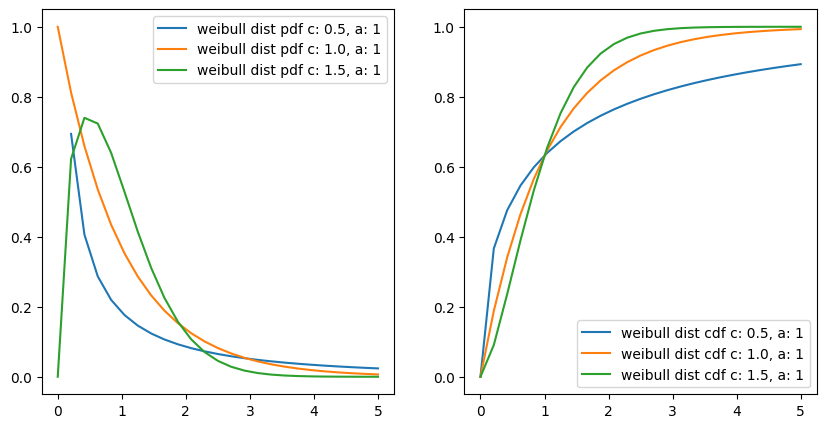

In [33]:
x = np.linspace(0, 5, 25)
x_tick_s = np.linspace(0, 5, 6)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

for i in np.arange(0.5, 2, 0.5):
    y_pdf = stats.exponweib.pdf(x, a=1, c=i)

    ax[0].plot(x, y_pdf, "-", label=f"weibull dist pdf c: {i}, a: 1")
    ax[0].set_xticks(x_tick_s)
    ax[0].legend()


for i in np.arange(0.5, 2, 0.5):
    y_cdf = stats.exponweib.cdf(x, a=1, c=i)

    ax[1].plot(x, y_cdf, "-", label=f"weibull dist cdf c: {i}, a: 1")
    ax[1].set_xticks(x_tick_s)
    ax[1].legend()

plt.show()

interestingly if we put c or k = 1

then $f(x;\lambda) = \lambda e^{-\lambda x}$

it becomes exponentiated exponential distribution and it is true also, as with a constant event rate Weibull distribution changes to exponential distribution.

## Points to note

* For events that occur at a constant rate, the number of events per unit of time or space can be
modeled as a Poisson distribution.
* In this scenario, you can also model the time or distance between one event and the next as an
exponential distribution.
* A changing event rate over time (e.g., an increasing probability of device failure) can be modeled
with the Weibull distribution.
